In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### View/Preview the Data

In [2]:
data= pd.read_csv('train.csv')
data.shape

C:\Users\Hanan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)

In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### Preview Data types and preprocess for EDA

In [4]:
#check for dtypes of the features, make sure date is in the right format
#and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Our data has inaccurate data types, so:

* change variable data types

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
#to a string
data['Store'] = data['Store'].astype('str')

#to categorical data,
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Open']= data['Open'].astype('category')
data['Promo']= data['Promo'].astype('category')

#this was formerly a string/object so we strip it of that and make it a category
data['StateHoliday']= data['StateHoliday'].astype(str).str.strip().astype('category')

data['SchoolHoliday']= data['SchoolHoliday'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  object        
 1   DayOfWeek      1017209 non-null  category      
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  category      
 6   Promo          1017209 non-null  category      
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(2), object(1)
memory usage: 35.9+ MB


In [8]:
data["ave_sales"] = data.loc[:, "Sales"]/data.loc[:, "Customers"]

In [9]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,ave_sales
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
ave_sales,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854


#### EDA: Wrangling, Cleaning and Visualization

In [19]:
%run exploratory_data_analysis.py

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [13]:
import missingno

Preview of data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,ave_sales
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  object        
 1   DayOfWeek      1017209 non-null  category      
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  category      
 6   Promo          1017209 non-null  category      
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  category      
 9   ave_sales      844340 non-null   float64       
dtypes: category(5), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 43.7+ MB
None

No duplicated entries found

To check: 
Unique count of non-numeric

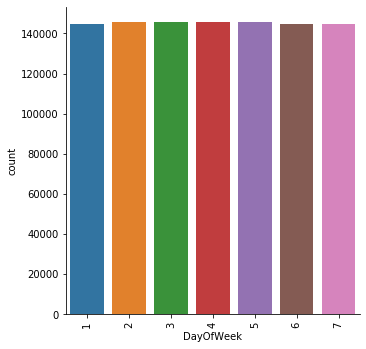

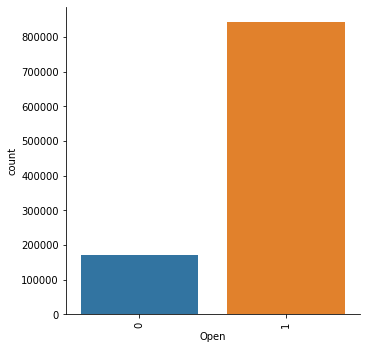

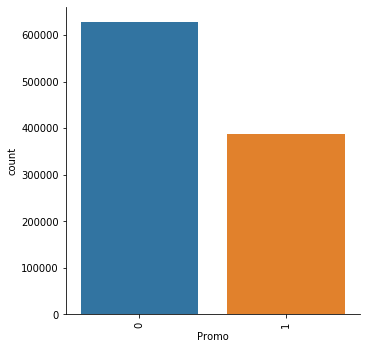

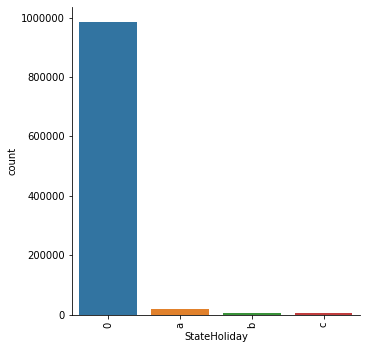

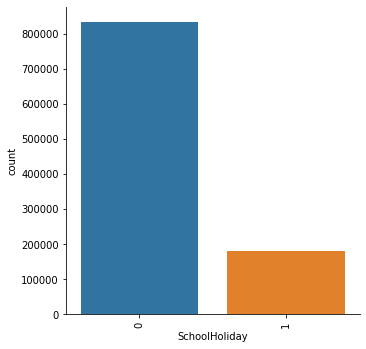


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
ave_sales,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854


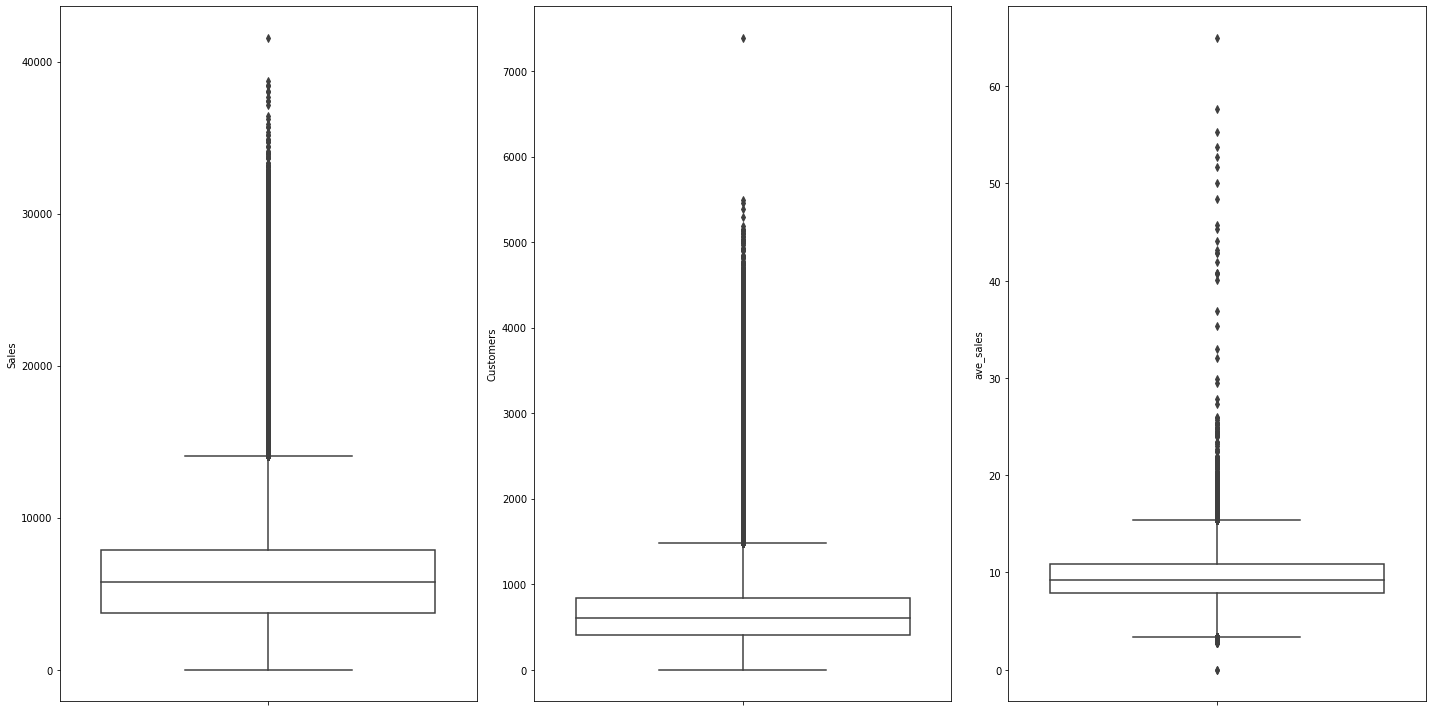

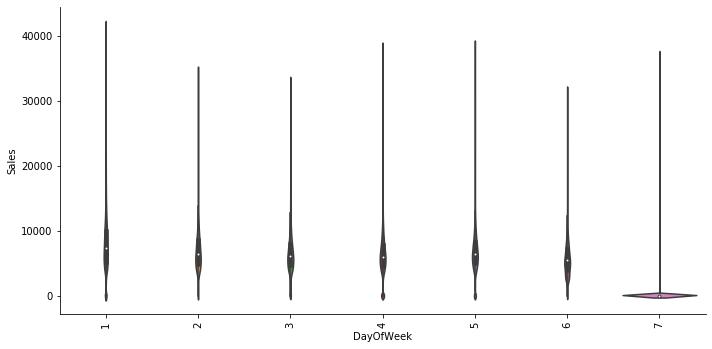

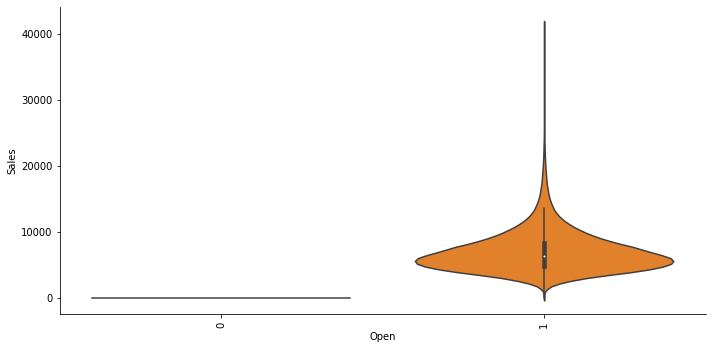

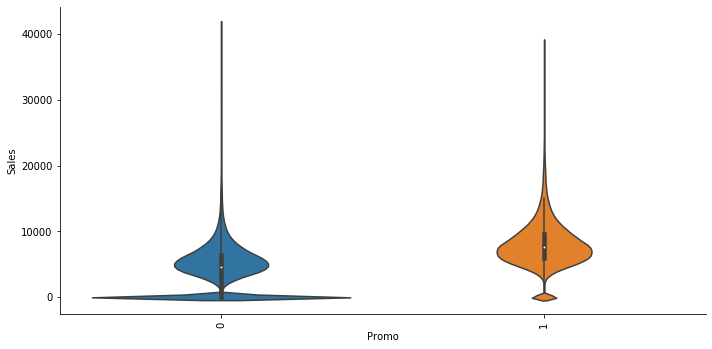

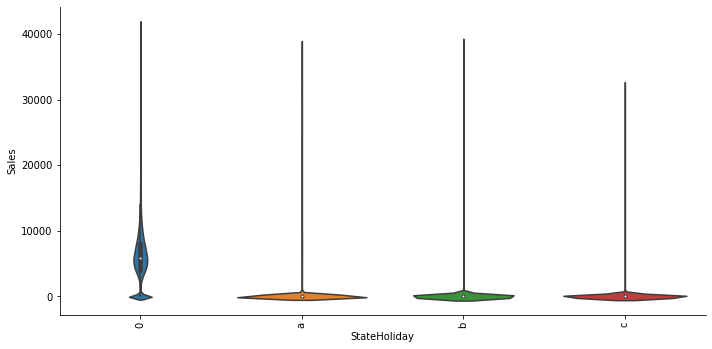

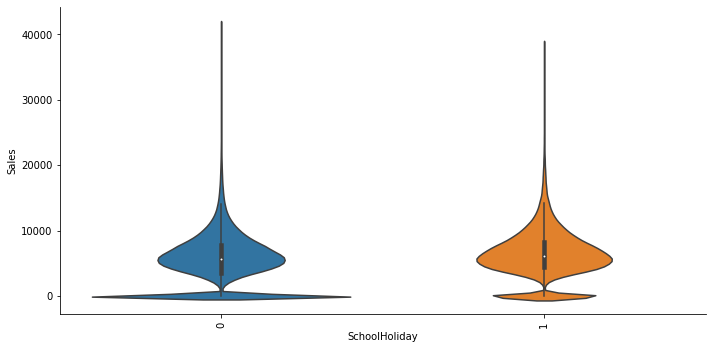

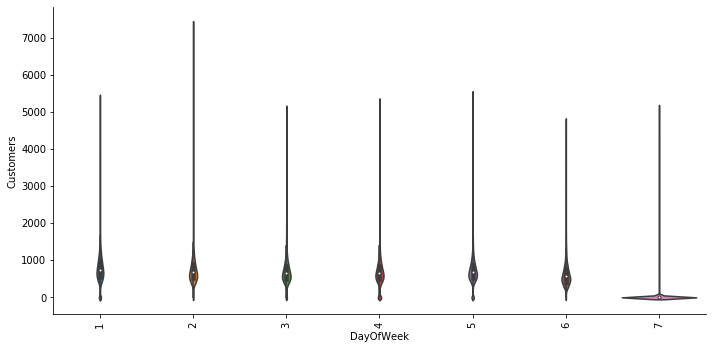

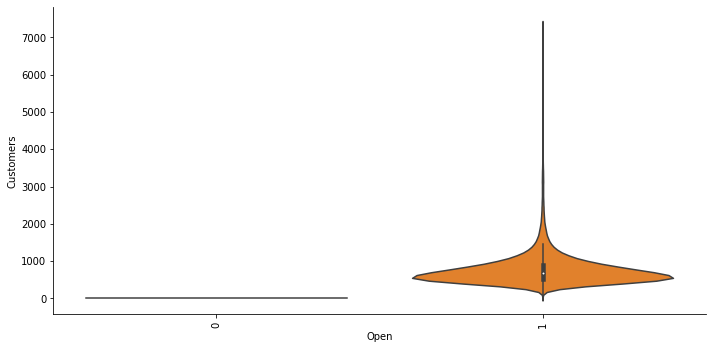

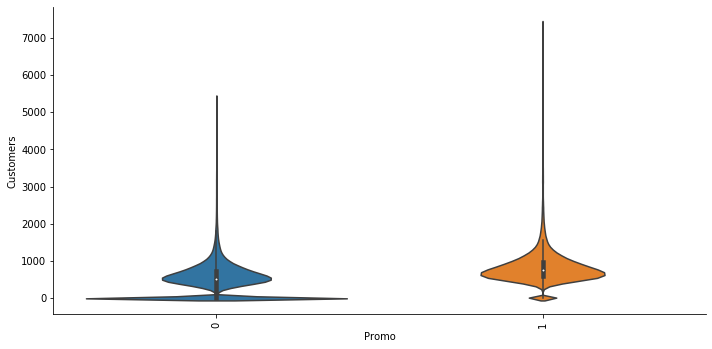

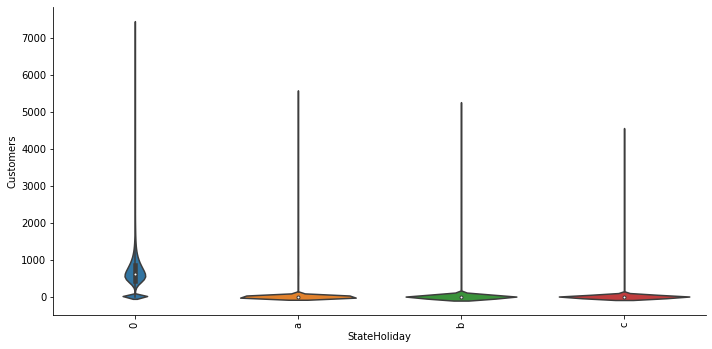

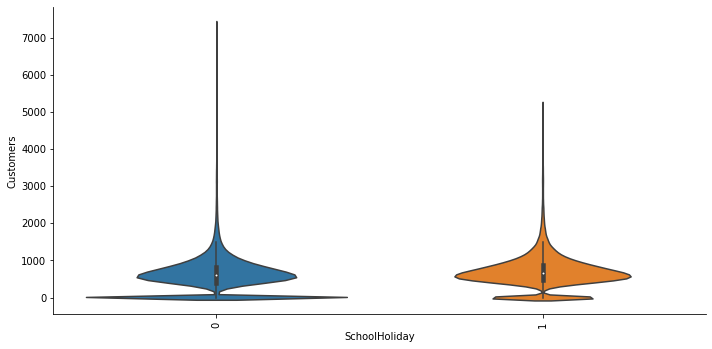

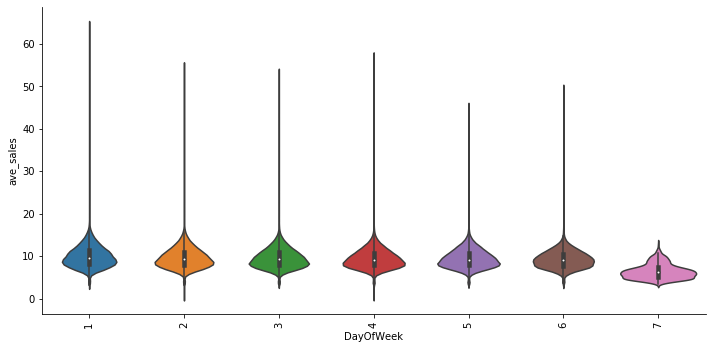

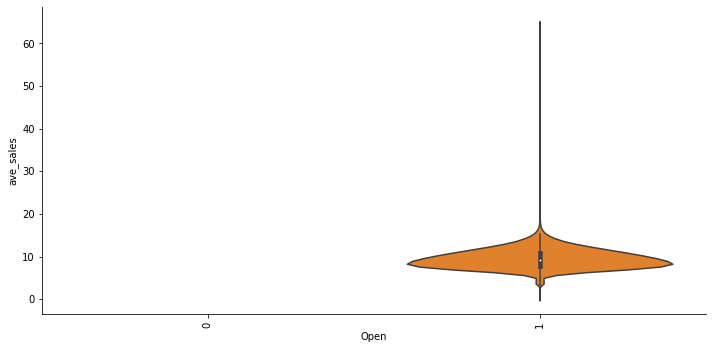

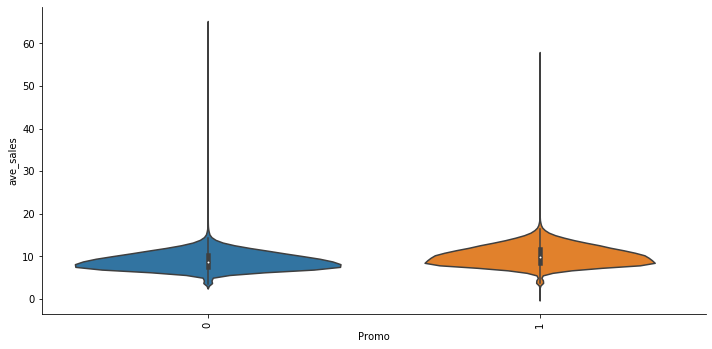

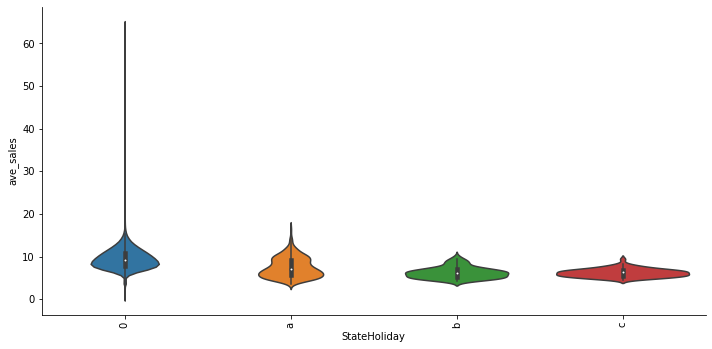

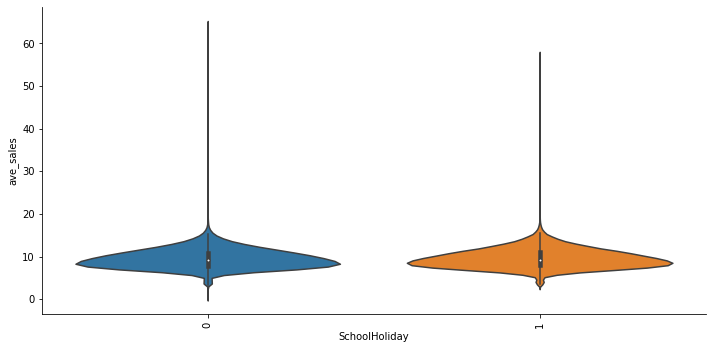


To check pairwise joint distribution of numeric data


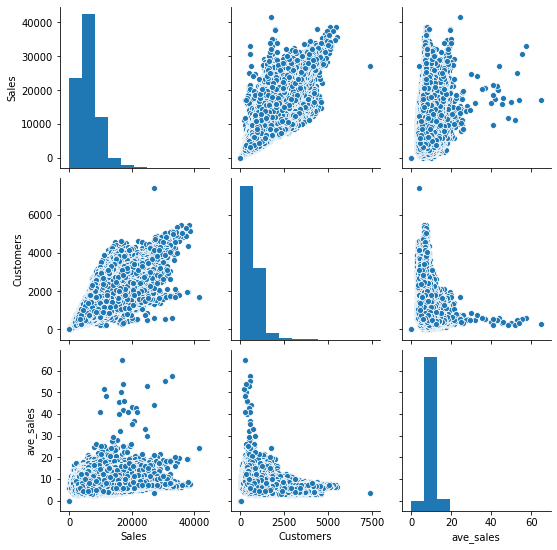


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


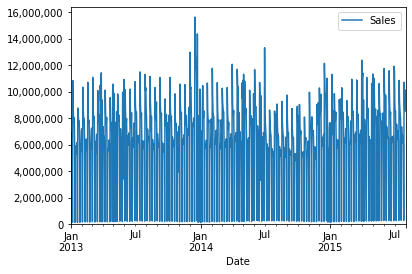

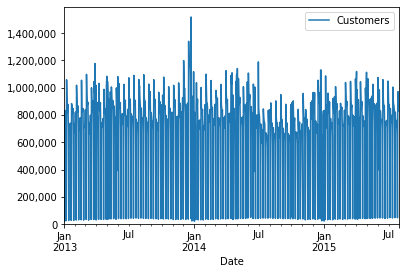

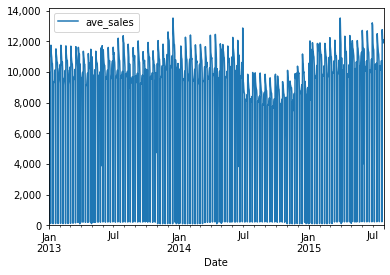

Plotting monthly data


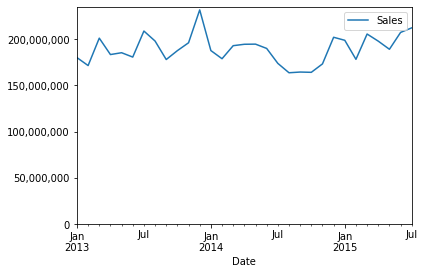

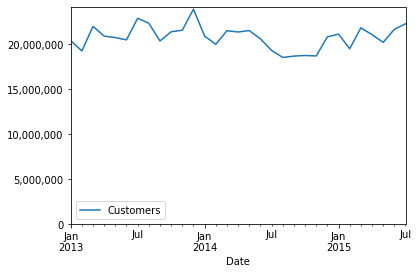

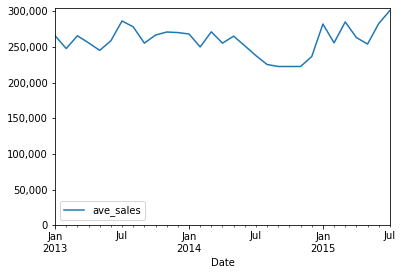

Plotting yearly data


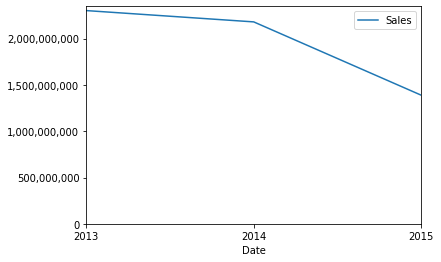

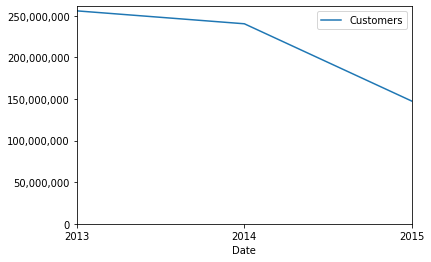

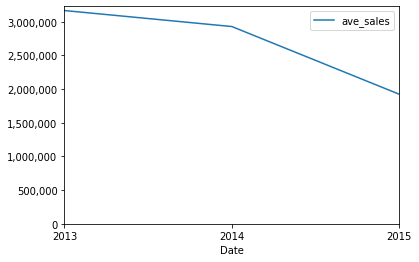

In [20]:
eda(data)

In [21]:
data['Promo'].count()

1017209

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
ave_sales,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854
